<a href="https://colab.research.google.com/github/zeynepbeyzaborekci/Galobal-AI-Summer-Camp-22-/blob/main/End_to_End_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medikal Maliyet Analizi Projesi

> **Amaç:** Verilen değişkenlere göre bir kişinin sağlık
sigortasının yaklaşık ne kadar masraflı olacağını tahmin etmek.

> **Veri Seti:** https://www.kaggle.com/datasets/mirichoi0218/insurance

> Grup Üyeleri

1.   Ahmet Emre Gökalp
2.   Bahadır Özcanlı
3.   Baver Can Aydoğan
4.   Deniz Sakarya
5.   Kadir Dündar
6.   Zehra Özdemir
7.   Zeynep Beyza Börekçi



# 1) Gerekli Kütüphanelerin Eklenmesi


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import  LabelEncoder

# MODELING
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as mae

import xgboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 2) Keşifsel Veri Analizi

In [ ]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


a) BMI Dağılımının İncelenmesi

Text(43, 90, 'ortalama: 30.66')

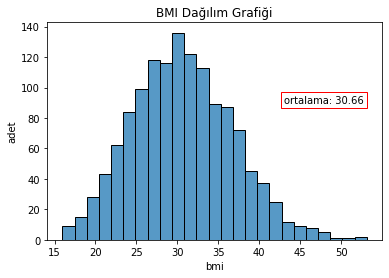

In [ ]:
sns.histplot(x="bmi", data=df)
plt.xlabel("bmi")
plt.ylabel("adet")
plt.title("BMI Dağılım Grafiği")
plt.text(43,90,'ortalama: {:.2f}'.format(df.bmi.mean()), color="black", bbox={'facecolor':'none', 'edgecolor': 'red',
       'boxstyle': 'square'})

b) Smoker ile Charges Arasındaki İlişki

  smoker  counts
0     no    1064
1    yes     274




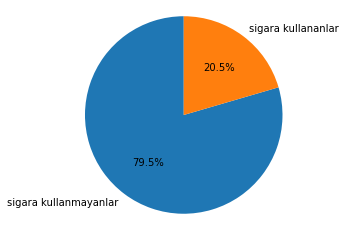

In [107]:
# smoker dağılımını inceleyelim
df2 = df.groupby(['smoker'])['smoker'].size().reset_index(name='counts')
size=df2.counts
fig1, ax1 = plt.subplots()
print(df2)
print("\n")
label="sigara kullanmayanlar", "sigara kullananlar"
ax1.pie(size, labels=label, startangle=90, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

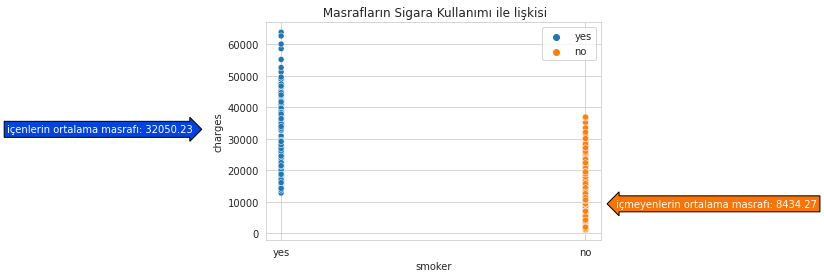

In [196]:
# scatterplot ile dağılımı inceleyelim
sns.scatterplot(data=df, x="smoker",y="charges",hue="smoker")
plt.title(" Masrafların Sigara Kullanımı ile lişkisi")
plt.legend(loc="upper right")
df3=df[df['smoker'].isin(['no'])]
df4=df[df['smoker'].isin(['yes'])]
plt.text(1.1,8434,'içmeyenlerin ortalama masrafı: {:.2f}'.format(df3.charges.mean()), color="white", bbox={'facecolor':'#F97306', 'edgecolor': 'black',
       'boxstyle': 'larrow'})
plt.text(-0.9,32050,'içenlerin ortalama masrafı: {:.2f}'.format(df4.charges.mean()), color="white", bbox={'facecolor':'#0343DF', 'edgecolor': 'black',
       'boxstyle': 'rarrow'})
plt.show()


**Sonuç:** Sigara içenlerin sağlık sigortası masrafları içmeyenlere göre daha fazladır.

c) Smoker ile Region Arasındaki İlişki

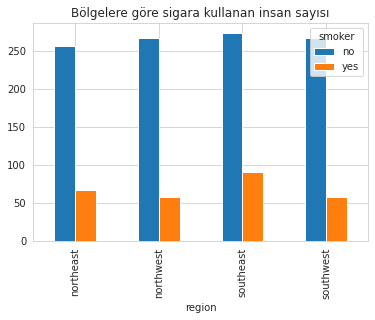

In [197]:
grafik = pd.crosstab(index=df["region"], columns=df["smoker"])
grafik.plot(kind="bar")
plt.title("Bölgelere göre sigara kullanan insan sayısı")
plt.show()

**Sonuç:** Bölgeler arasındaki sigara kullanımında belirgin farklar görülmemektedir.

d) BMI ile Sex Arasındaki İlişki